# **HW1**
## **Zhenyu Wu**
## **A69030822**

In [372]:
import sympy as sp
import numpy as np
import math

## **Question 1.a Forward Kinematic**

In [375]:
theta0, theta1, theta2 = sp.symbols('theta0 theta1 theta2')

In [377]:
l0, l1, l2 = 10,10,10

In [379]:
x = l0 * sp.sin(theta0) + l1 * sp.sin(theta0 + theta1) + l2 * sp.sin(theta0 + theta1 + theta2)
y = 5 + l0 * sp.cos(theta0) + l1 * sp.cos(theta0 + theta1) + l2 * sp.cos(theta0 + theta1 + theta2)

In [381]:
dx_dtheta0 = sp.diff(x, theta0)
dx_dtheta1 = sp.diff(x, theta1)
dx_dtheta2 = sp.diff(x, theta2)

In [383]:
dy_dtheta0 = sp.diff(y, theta0)
dy_dtheta1 = sp.diff(y, theta1)
dy_dtheta2 = sp.diff(y, theta2)

In [385]:
print(f"dx/dtheta0: {dx_dtheta0}")
print(f"dx/dtheta1: {dx_dtheta1}")
print(f"dx/dtheta2: {dx_dtheta2}")


dx/dtheta0: 10*cos(theta0) + 10*cos(theta0 + theta1) + 10*cos(theta0 + theta1 + theta2)
dx/dtheta1: 10*cos(theta0 + theta1) + 10*cos(theta0 + theta1 + theta2)
dx/dtheta2: 10*cos(theta0 + theta1 + theta2)


In [387]:
print(f"dy/dtheta0: {dy_dtheta0}")
print(f"dy/dtheta1: {dy_dtheta1}")
print(f"dy/dtheta2: {dy_dtheta2}")

dy/dtheta0: -10*sin(theta0) - 10*sin(theta0 + theta1) - 10*sin(theta0 + theta1 + theta2)
dy/dtheta1: -10*sin(theta0 + theta1) - 10*sin(theta0 + theta1 + theta2)
dy/dtheta2: -10*sin(theta0 + theta1 + theta2)


## **Question 1.b Inverse Kinematics**

In [390]:
import sympy as sp
import numpy as np

theta0, theta1, theta2 = sp.symbols('theta0 theta1 theta2')

l0, l1, l2 = 10, 10, 10

x = l0 * sp.sin(theta0) + l1 * sp.sin(theta0 + theta1) + l2 * sp.sin(theta0 + theta1 + theta2)
y = 5 + l0 * sp.cos(theta0) + l1 * sp.cos(theta0 + theta1) + l2 * sp.cos(theta0 + theta1 + theta2)

dx_dtheta0 = sp.diff(x, theta0)
dx_dtheta1 = sp.diff(x, theta1)
dx_dtheta2 = sp.diff(x, theta2)
dy_dtheta0 = sp.diff(y, theta0)
dy_dtheta1 = sp.diff(y, theta1)
dy_dtheta2 = sp.diff(y, theta2)

dx_dtheta0_func = sp.lambdify((theta0, theta1, theta2), dx_dtheta0)
dx_dtheta1_func = sp.lambdify((theta0, theta1, theta2), dx_dtheta1)
dx_dtheta2_func = sp.lambdify((theta0, theta1, theta2), dx_dtheta2)
dy_dtheta0_func = sp.lambdify((theta0, theta1, theta2), dy_dtheta0)
dy_dtheta1_func = sp.lambdify((theta0, theta1, theta2), dy_dtheta1)
dy_dtheta2_func = sp.lambdify((theta0, theta1, theta2), dy_dtheta2)

In [392]:
# Initial angle
theta0_val = 0
theta1_val = 0
theta2_val = 0

# Compute Jacobian
jacobian = np.array([
    [dx_dtheta0_func(theta0_val, theta1_val, theta2_val),
     dx_dtheta1_func(theta0_val, theta1_val, theta2_val),
     dx_dtheta2_func(theta0_val, theta1_val, theta2_val)],
    [dy_dtheta0_func(theta0_val, theta1_val, theta2_val),
     dy_dtheta1_func(theta0_val, theta1_val, theta2_val),
     dy_dtheta2_func(theta0_val, theta1_val, theta2_val)]
])

print("Jacobian:")
print(jacobian)

Jacobian:
[[30. 20. 10.]
 [-0. -0. -0.]]


In [394]:
import numpy as np
import math

# initial angle
theta0_val = 0
theta1_val = 0
theta2_val = 0

l0, l1, l2 = 10, 10, 10

# desired pose
target = np.array([10, 10])

# iteration
max_iterations = 500  
error_threshold = 0  
step_size = 0.1  

# Constraint
angle_limit =  math.pi / 2

def calculate_jacobian(theta0_val, theta1_val, theta2_val):
    jacobian = np.array([
        [dx_dtheta0_func(theta0_val, theta1_val, theta2_val),
         dx_dtheta1_func(theta0_val, theta1_val, theta2_val),
         dx_dtheta2_func(theta0_val, theta1_val, theta2_val)],
        [dy_dtheta0_func(theta0_val, theta1_val, theta2_val),
         dy_dtheta1_func(theta0_val, theta1_val, theta2_val),
         dy_dtheta2_func(theta0_val, theta1_val, theta2_val)]
    ])
    return jacobian

def calculate_position(theta0_val, theta1_val, theta2_val):
    x_new = l0 * math.sin(theta0_val) + l1 * math.sin(theta0_val + theta1_val) + l2 * math.sin(theta0_val + theta1_val + theta2_val)
    y_new = 5 + l0 * math.cos(theta0_val) + l1 * math.cos(theta0_val + theta1_val) + l2 * math.cos(theta0_val + theta1_val + theta2_val)
    return np.array([x_new, y_new])

for iteration in range(max_iterations):
    # Current position
    current_position = calculate_position(theta0_val, theta1_val, theta2_val)

    # Current dx
    position_error = target - current_position

    # Break at error_threshold
    if np.linalg.norm(position_error) < error_threshold:
        print(f"Stoped at: {iteration}")
        break

    # Update Jacobian
    jacobian = calculate_jacobian(theta0_val, theta1_val, theta2_val)
    U, Sigma, Vt = np.linalg.svd(jacobian)
    Sigma_inv = np.zeros((Vt.shape[0], U.shape[1]))
    for i in range(len(Sigma)):
        if Sigma[i] > 1e-10: 
            Sigma_inv[i, i] = 1.0 / Sigma[i]
    jacobian_inv = np.dot(Vt.T, np.dot(Sigma_inv, U.T))

    # dtheta
    delta_theta = np.dot(jacobian_inv, position_error)

    # Update theta
    theta0_val = np.clip(theta0_val + step_size * delta_theta[0], -angle_limit, angle_limit)
    theta1_val = np.clip(theta1_val + step_size * delta_theta[1], -angle_limit, angle_limit)
    theta2_val = np.clip(theta2_val + step_size * delta_theta[2], -angle_limit, angle_limit)

final_position = calculate_position(theta0_val, theta1_val, theta2_val)
print(f"Final q0（radian） = {theta0_val:.4f}， q0（degree） = {math.degrees(theta0_val):.3f}")
print(f"Final q1（radian） = {theta1_val:.4f}， q1（degree） = {math.degrees(theta1_val):.3f}")
print(f"Final q2（radian） = {theta2_val:.4f}， q2（degree） = {math.degrees(theta2_val):.3f}")
print(f"Final Position: x={final_position[0]}, y={final_position[1] + 5}") #Add 5 to the final y


Final q0（radian） = -0.4574， q0（degree） = -26.207
Final q1（radian） = 1.5708， q1（degree） = 90.000
Final q2（radian） = 1.4525， q2（degree） = 83.223
Final Position: x=10.000000020139478, y=15.000000073094194


In [32]:
#Final Jacobian
jacobian = np.array([
        [dx_dtheta0_func(theta0_val, theta1_val, theta2_val),
         dx_dtheta1_func(theta0_val, theta1_val, theta2_val),
         dx_dtheta2_func(theta0_val, theta1_val, theta2_val)],
        [dy_dtheta0_func(theta0_val, theta1_val, theta2_val),
         dy_dtheta1_func(theta0_val, theta1_val, theta2_val),
         dy_dtheta2_func(theta0_val, theta1_val, theta2_val)]
    ])

In [34]:
from scipy.linalg import null_space
null_space_of_jacobian = null_space(jacobian)

In [36]:
print(null_space_of_jacobian)

[[ 0.53304618]
 [-0.59639478]
 [ 0.60014584]]


## **Question 2.1 b Homograph Matrix**

In [306]:
import numpy as np

count = 0
img_count = 1
img_coord = {}
entry = []

with open('./imgpoints.txt', 'r') as file:
    for line in file:
        count += 1
        u, v = map(float, line.strip().split(' ', 1)) 
        entry.append(np.array([u, v])) 
        if count % 48 == 0:
            img_coord[img_count] = np.array(entry)
            img_count += 1
            entry = []


**I Plot the graph of given (u,v) to better find correspondence with (x,y)**

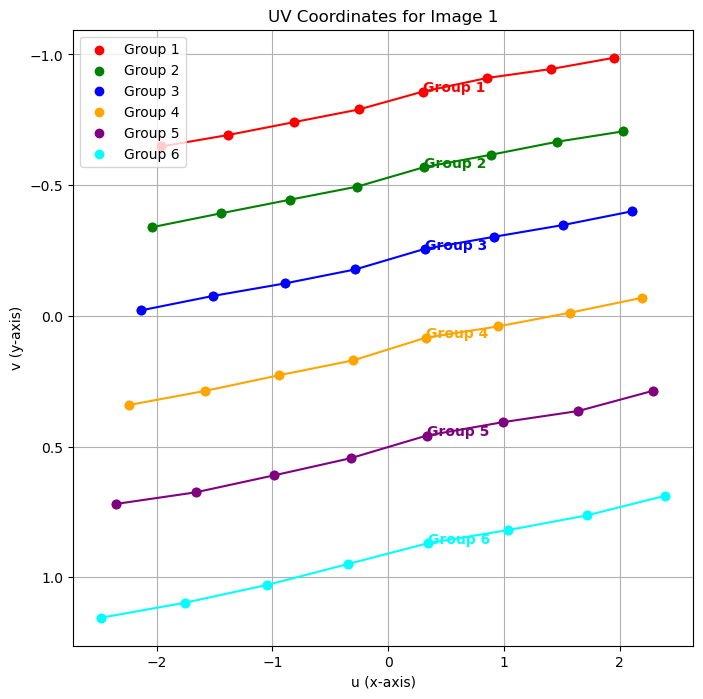

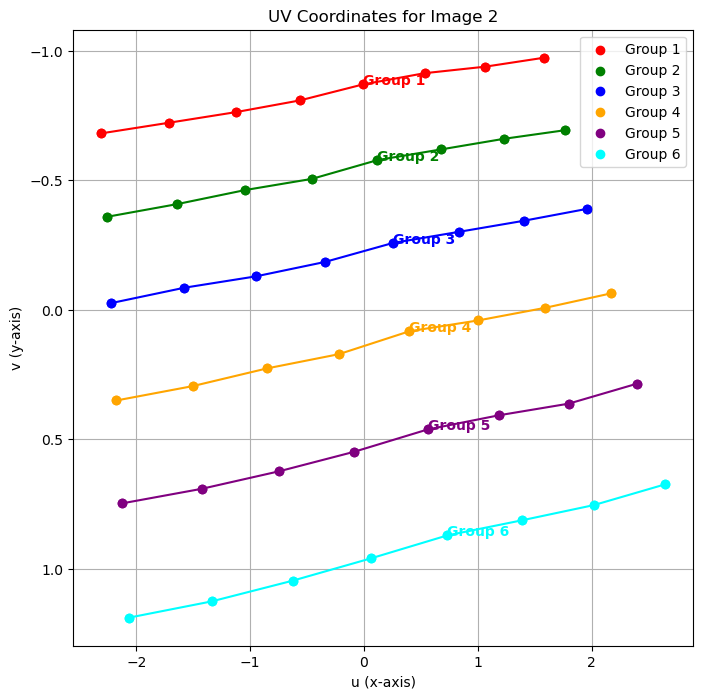

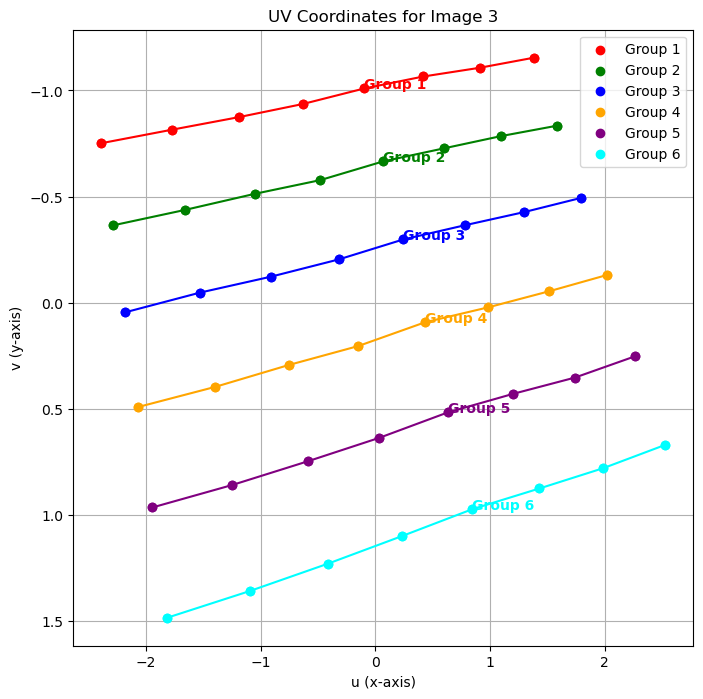

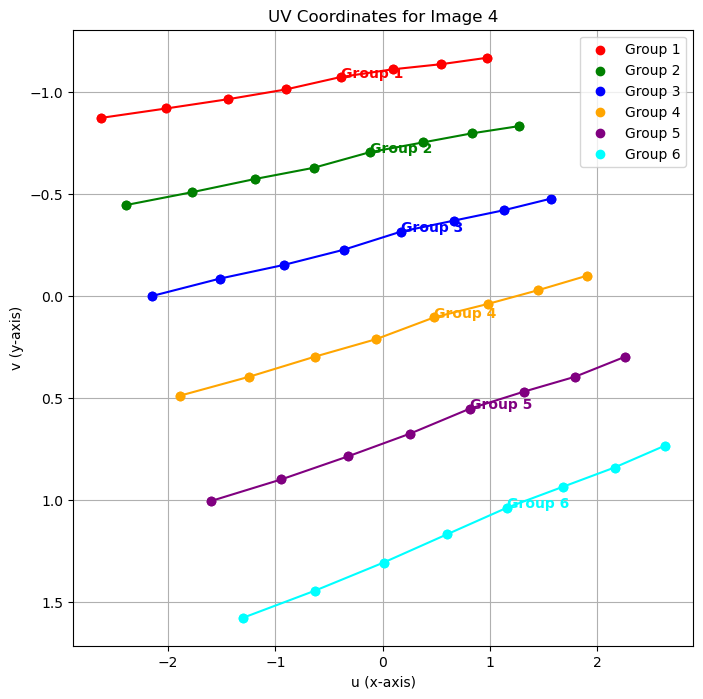

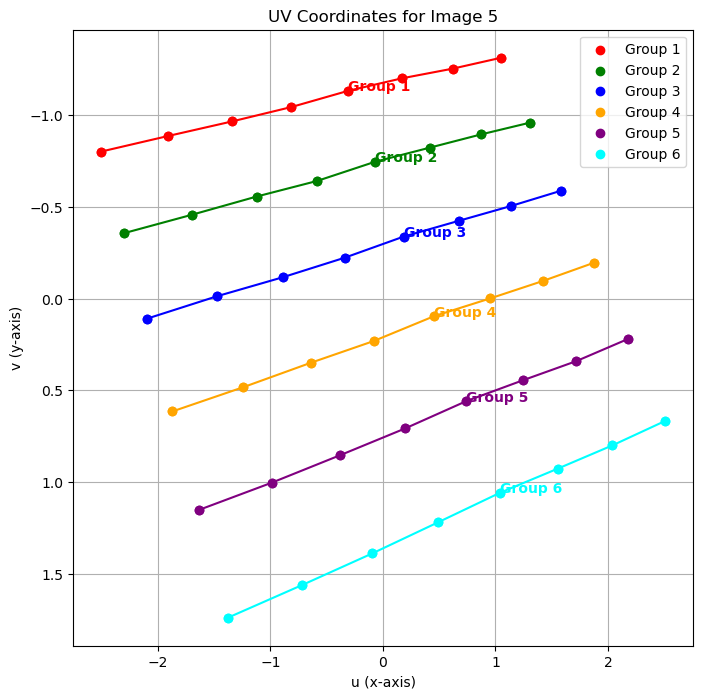

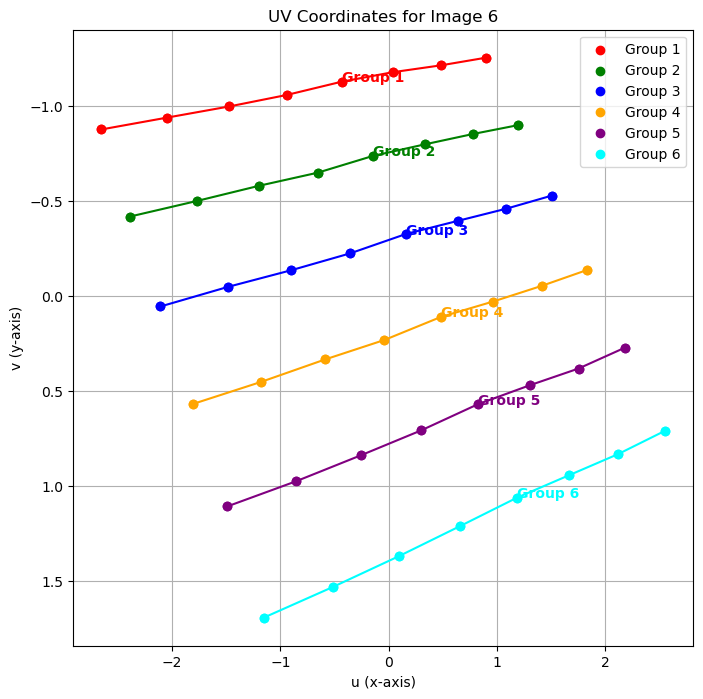

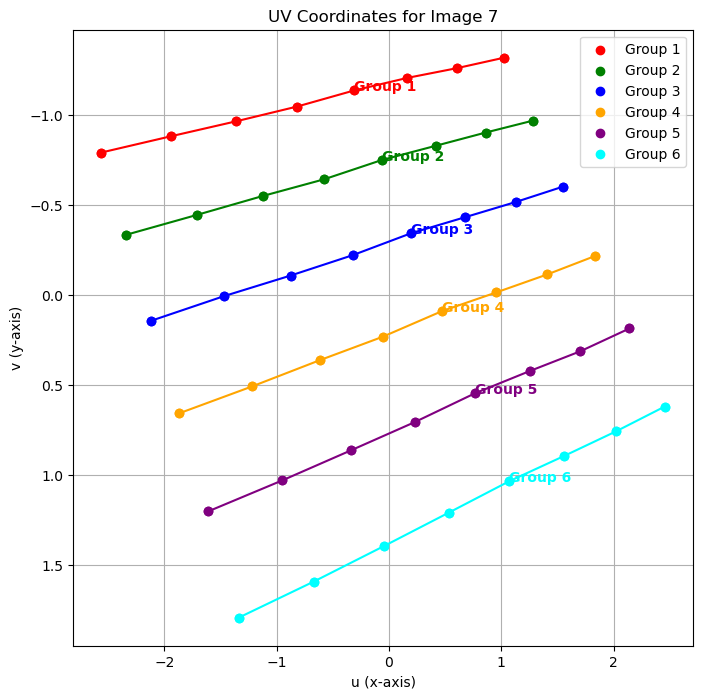

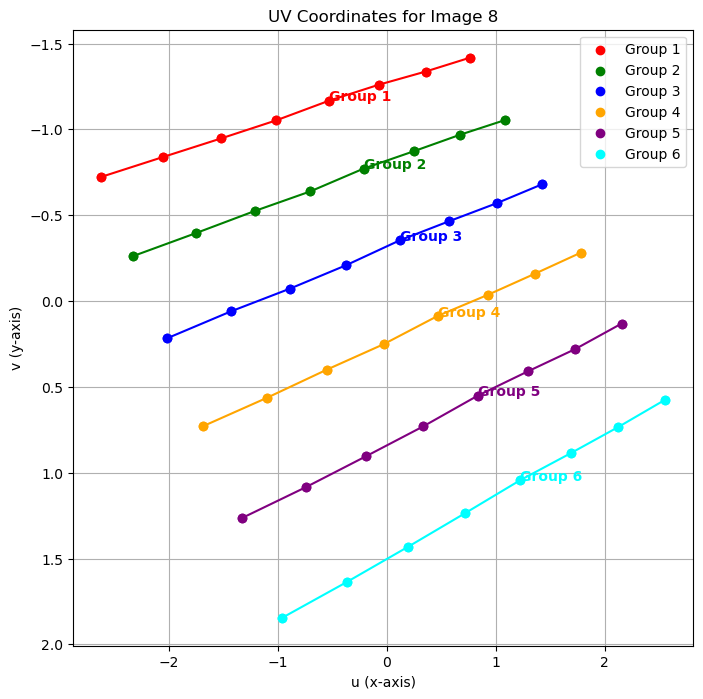

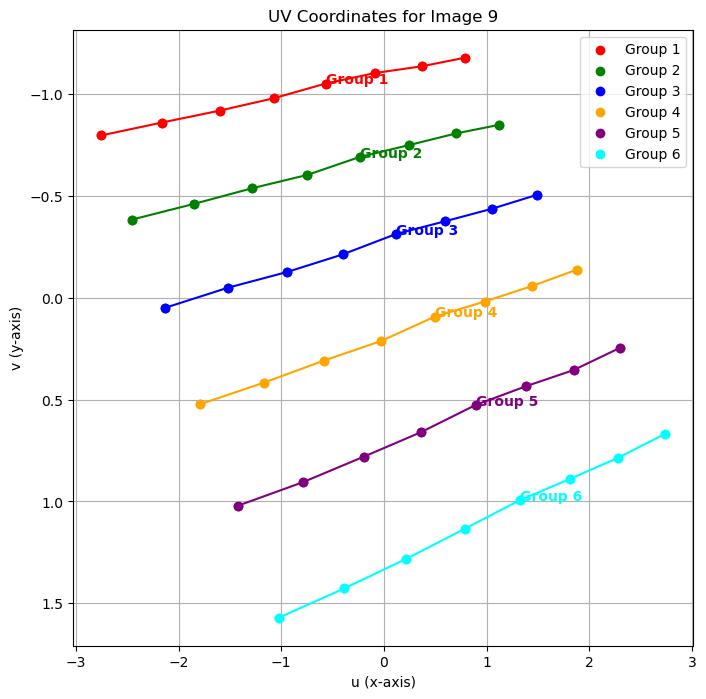

In [366]:
import numpy as np
import matplotlib.pyplot as plt

## Build Correspondence
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Plot the UV coordinates for each image
for img_num, uv_coords in img_coord.items():
    plt.figure(figsize=(8, 8)) 

    # Plot and connect UV points in batches of 8
    for group_num in range(6):  
        group_start = group_num * 8
        group_end = group_start + 8
        u_vals = uv_coords[group_start:group_end, 0]  
        v_vals = uv_coords[group_start:group_end, 1]  
        
        # Plot the UV points
        plt.scatter(u_vals, v_vals, c=colors[group_num], label=f'Group {group_num + 1}')
        plt.plot(u_vals, v_vals, c=colors[group_num], linestyle='-', marker='o')
        midpoint_idx = len(u_vals) // 2
        plt.text(u_vals[midpoint_idx], v_vals[midpoint_idx], f'Group {group_num + 1}',
                 fontsize=10, color=colors[group_num], fontweight='bold')

    plt.title(f'UV Coordinates for Image {img_num}')
    plt.xlabel('u (x-axis)')
    plt.ylabel('v (y-axis)')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.legend()
    plt.show()


In [309]:
import numpy as np
#Generate Checkerboard Coordinates

square_size = 25 
x_corners = 8  
y_corners = 6  

# The starting point is at the top-left corner (25, 150)
start_x = 25
start_y = 150


checkerboard_coords = []


for j in range(y_corners):
    current_y = start_y - j * square_size  
    for i in range(x_corners):
        current_x = start_x + i * square_size 
        checkerboard_coords.append([current_x, current_y])


checkerboard_coords = np.array(checkerboard_coords)

In [312]:
## Normalize Data
# Normalize checkerboard coordinates xy
mean_x = sum(x for x, y in checkerboard_coords) / len(checkerboard_coords)
mean_y = sum(y for x, y in checkerboard_coords) / len(checkerboard_coords)
mean_coords = np.array([mean_x, mean_y])
N = len(checkerboard_coords)
sum_norm = sum(np.linalg.norm(np.array([x, y]) - mean_coords) for x, y in checkerboard_coords)
s_checkerboard = np.sqrt(2) * N * (sum_norm) ** -1
N_checkerboard = np.array(
    [[s_checkerboard, 0, -s_checkerboard*mean_x],
    [0, s_checkerboard, -s_checkerboard*mean_y],
    [0,0,1]]
)
checkerboard_norm = []
for i in range(0, len(checkerboard_coords)):
    x,y = checkerboard_coords[i][0],checkerboard_coords[i][1]
    xh = np.array([x,y,1]).reshape(-1,1)
    xn = np.dot(N_checkerboard, xh).T.flatten()
    checkerboard_norm.append([xn[0]/xn[2], xn[1]/xn[2]])
checkerboard_norm = np.array(checkerboard_norm)
checkerboard_coords = []
checkerboard_coords = checkerboard_norm

# Normalize image coordinates uv

N = 48
for img_ind in img_coord.keys():
    img_norm = []
    uv_coord = img_coord[img_ind]
    mean_u = sum(u for u, v in uv_coord) / len(uv_coord)
    mean_v = sum(v for u, v in uv_coord) / len(uv_coord)
    mean_coords = np.array([mean_u, mean_v])
    sum_norm = sum(np.linalg.norm(np.array([u, v]) - mean_coords) for u, v in uv_coord)
    s_img = np.sqrt(2) * N * (sum_norm) ** -1
    N_img = np.array(
        [[s_img, 0, -s_img*mean_u],
        [0, s_img, -s_img*mean_v],
        [0,0,1]]
    )
    for coord in uv_coord:
        u,v = coord[0], coord[1]
        uh = np.array([u,v,1]).reshape(-1,1)
        un = np.dot(N_img,uh).T.flatten()
        img_norm.append([un[0]/un[2], un[1]/un[2]])
    img_norm = np.array(img_norm)
    img_coord[img_ind] = img_norm

In [314]:
for img_ind in img_coord.keys():
    uv_coord = img_coord[img_ind]
    for (X, Y), (u, v) in zip(checkerboard_coords, uv_coord):
        x_matrix = np.array([X,Y, 1]).reshape(-1,1)
        u_matrix = np.array([u, v, 1]).reshape(-1,1)
        sum_u = v

In [316]:
#Stack M for each image
img_M = {}

#Create Linear Equation
def create_matrix_for_point(X, Y, u, v):
    # Create the matrix for a single pair of (X, Y) and (u, v)
    row1 = [-X, -Y, -1, 0, 0, 0, u * X, u * Y, u]
    row2 = [0, 0, 0, -X, -Y, -1, v * X, v * Y, v]
    
    return np.array([row1, row2])

for img_ind in img_coord.keys():
    M_i = []
    uv_coord = img_coord[img_ind]
    for (X, Y), (u, v) in zip(checkerboard_coords, uv_coord):
        M_i.append(create_matrix_for_point(X, Y, u, v))
    M_i = np.vstack(M_i)
    img_M[img_ind] = M_i

In [318]:
#Solve for h
img_h = {}
for img_ind in img_M:
    M_i = img_M[img_ind]
    U, Sigma, Vt = np.linalg.svd(M_i)
    Sigma_matrix = np.diag(Sigma)
    sigma = np.diagonal(Sigma_matrix)
    k = np.argmin(sigma)
    h = Vt[k]
    H = h.reshape(3, 3)
    img_h[img_ind] = H

In [320]:
#Calculate L2 Norm
img_dis = {}
for img_id in img_h.keys():
    print(f'Euclidean Distance of img: {img_id} is:', end = ' ')
    
    uv_coord = img_coord[img_id]
    distance = 0
    for (X, Y), (u, v) in zip(checkerboard_coords, uv_coord):
        XY_homogeneous = np.array([X, Y, 1])
        transformed_XY = np.dot(img_h[img_id], XY_homogeneous)
        transformed_XY = transformed_XY / transformed_XY[2]
        distance += np.linalg.norm(np.array([u, v]) - transformed_XY[:2])
    img_dis[img_id] = distance
    print(img_dis[img_id])


Euclidean Distance of img: 1 is: 0.38779780531545954
Euclidean Distance of img: 2 is: 0.37049373662639784
Euclidean Distance of img: 3 is: 0.3280351736699983
Euclidean Distance of img: 4 is: 0.3588135455947763
Euclidean Distance of img: 5 is: 0.29788563475640994
Euclidean Distance of img: 6 is: 0.3398817395968732
Euclidean Distance of img: 7 is: 0.3100984746708968
Euclidean Distance of img: 8 is: 0.31875315857174025
Euclidean Distance of img: 9 is: 0.39375515766186103


## **Question 2.2 b & c Intrinsic Camera Matrix**

In [323]:
#Create v(H)
def create_v_H(H, p, q):
    v1 = np.dot(H[0][p], H[0][q])
    v2 = np.dot(H[0][p], H[1][q]) + np.dot(H[1][p], H[0][q])
    v3 = np.dot(H[1][p], H[1][q])
    v4 = np.dot(H[2][p], H[0][q]) + np.dot(H[0][p], H[2][q])
    v5 = np.dot(H[2][p], H[1][q]) + np.dot(H[1][p], H[2][q])
    v6 = np.dot(H[2][p], H[2][q])
    v = np.array([v1,v2,v3,v4,v5,v6])
    return v

#Create Linear equation for each H
def create_Li(H):
    l1 = create_v_H(H, 0, 1)
    l2 = create_v_H(H, 0, 0) - create_v_H(H, 1, 1)
    return np.vstack([l1, l2])


#Create linear equation for all H
def create_L(img_h):
    img_count = len(img_h.keys())
    L = []
    for img_id in img_h.keys():
        L.append(create_Li(img_h[img_id]))
    L_s = np.vstack(L)
    U, Sigma, Vt = np.linalg.svd(L_s)
    Sigma_matrix = np.diag(Sigma)
    sigma = np.diagonal(Sigma_matrix)
    k = np.argmin(sigma)
    b = Vt[k]
    return b

In [325]:
#Solve for b
b = create_L(img_h)

#Compute A
w = b[0]*b[2]*b[5] - (b[1]**2)*b[5] - b[0]*(b[4]**2) + 2*b[1]*b[3]*b[4] - b[2] * (b[3]**2)
d = b[0] * b[2] - (b[1] ** 2)
alpha = math.sqrt(w / (d * b[0]))
beta = math.sqrt(w/(d**2) * b[0])
gamma = math.sqrt(w / ((d**2) * b[0])) * b[1]
u_c = (b[1] * b[4] - b[2] * b[3]) / d
v_c = (b[1] * b[3] - b[0] * b[4]) / d
A = np.array([[alpha, gamma, u_c],[0, beta, v_c],[0,0,1]])
print(A)

[[ 13.42030417 -11.67560508   1.31877801]
 [  0.           5.7023712   -8.82913388]
 [  0.           0.           1.        ]]


## **Question 2.3 a & b Extrinsic Matrix**

In [328]:
#Calculate (R|t) for each image
A_inv = np.linalg.inv(A)
img_R = {}
img_t = {}
for img_ind in img_h.keys():
    h0 = img_h[img_ind][:,0].reshape(-1, 1)
    h1 = img_h[img_ind][:,1].reshape(-1, 1)
    h2 = img_h[img_ind][:,2].reshape(-1, 1)
    lambd = 1 / (np.linalg.norm(np.dot(A_inv, h0)))
    r0 = np.dot(lambd, np.dot(A_inv, h0))
    r1 = np.dot(lambd, np.dot(A_inv, h1))
    t = np.dot(lambd, np.dot(A_inv, h2))
    r2 = np.cross(r0.flatten(), r1.flatten()).reshape(-1, 1)
    img_R[img_ind] = np.hstack((r0,r1,r2))
    img_t[img_ind] = t

In [330]:
for img_ind in img_R.keys():
    print(f'Image {img_ind}, R:\n{img_R[img_id]}\n t:\n{img_t[img_ind]}\n')

Image 1, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.63360694]
 [-0.39111585 -0.43560643  0.01111531]]
 t:
[[-15.36005004]
 [-19.03610732]
 [-12.35791265]]

Image 2, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.63360694]
 [-0.39111585 -0.43560643  0.01111531]]
 t:
[[-12.20201346]
 [-15.11428346]
 [ -9.81229798]]

Image 3, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.63360694]
 [-0.39111585 -0.43560643  0.01111531]]
 t:
[[-10.03146551]
 [-12.40570828]
 [ -8.05860169]]

Image 4, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.63360694]
 [-0.39111585 -0.43560643  0.01111531]]
 t:
[[ -8.32256725]
 [-10.29034177]
 [ -6.68794441]]

Image 5, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.63360694]
 [-0.39111585 -0.43560643  0.01111531]]
 t:
[[ 9.5206554 ]
 [11.77177849]
 [ 7.65241627]]

Image 6, R:
[[-0.831021    0.69444604  0.29632703]
 [-0.39551548  0.31713862 -0.633

In [332]:
#Calculate Trajectory
camera_coord = {}
for img_ind in img_R:
    R = img_R[img_ind]
    t = img_t[img_ind]
    C = -np.dot(R.T, t)
    camera_coord[img_ind] = C.T.flatten()
    print(f'Image {img_ind}, C: \n{C.T.flatten()}')

Image 1, C: 
[-14.75354006 -15.96049471 -18.7616651 ]
Image 2, C: 
[-16.40055416  -5.03587602  -9.69028723]
Image 3, C: 
[-15.50373659   3.82577143  -5.96198556]
Image 4, C: 
[-13.6930206    4.90355041  -3.49723056]
Image 5, C: 
[-15.33619297   8.29003444   5.46454143]
Image 6, C: 
[-13.61744018   7.87784294  -3.42741627]
Image 7, C: 
[-13.6919723    7.4112939   -3.56110464]
Image 8, C: 
[-17.11713832  15.18323602   8.01262222]
Image 9, C: 
[-14.63027816   6.59266723  -4.28358894]


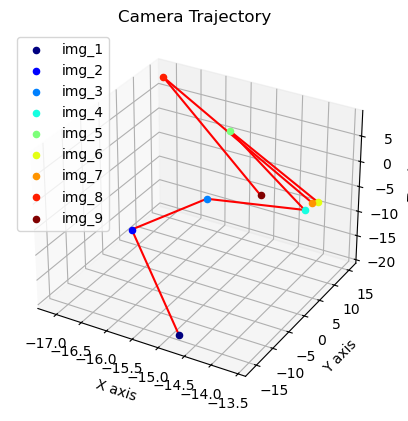

In [364]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals = []
y_vals = []
z_vals = []
img_indices = []

for img_ind in camera_coord:
    x_vals.append(camera_coord[img_ind][0])
    y_vals.append(camera_coord[img_ind][1])
    z_vals.append(camera_coord[img_ind][2])
    img_indices.append(img_ind)

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)
colors = cm.jet(np.linspace(0, 1, len(img_indices)))
for i in range(len(x_vals)):
    ax.scatter(x_vals[i], y_vals[i], z_vals[i], color=colors[i], label=f'img_{img_indices[i]}', marker='o')
for i in range(len(x_vals) - 1):
    ax.plot([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i+1]], [z_vals[i], z_vals[i+1]], color='r')

ax.legend(loc='best')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Camera Trajectory')
plt.show()
